Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 4

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make a Shapley force plot to explain at least 1 individual prediction.
- [ ] Share at least 1 visualization on Slack.

(If you haven't completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!


## Links
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving brasilia.csv to brasilia (1).csv
Saving florida.csv to florida (1).csv
Saving hawaii.csv to hawaii (1).csv
Saving panama.csv to panama (1).csv
Saving puerto.csv to puerto (1).csv
Saving samoa.csv to samoa (1).csv


In [8]:
names = []
for i in uploaded:
  i = i.replace(' (1)','')
  print(i)
  names.append(i)

brasilia.csv
florida.csv
hawaii.csv
panama.csv
puerto.csv
samoa.csv


In [0]:
import pandas as pd
import numpy as np

data = pd.DataFrame([])

In [10]:
for i in names:
  df = pd.read_csv(i)
  place = i.replace('.csv','')
  df['location'] = len(df) * [place]
  data = data.append(df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [11]:
data.head()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature,Unnamed: 0,apparentTemperature,cel,cloudCover,date,dewPoint,humidity,icon,location,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,0,0,0,137.15,17,0,70.64,21.150000,0.19,2011-01-05 02:00:00,64.40,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Partly Cloudy,70.07,1294192800,0.0,6.216,350.0,NaN,3.46
1,0,0,0,141.25,17,1,70.41,21.150000,0.75,2011-01-05 03:00:00,62.59,0.77,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,70.07,1294196400,0.0,6.216,281.0,NaN,4.61
2,0,0,0,140.03,17,2,68.65,20.144444,0.75,2011-01-05 04:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294200000,0.0,6.216,311.0,NaN,2.29
3,0,0,0,133.91,17,3,68.65,20.144444,0.75,2011-01-05 05:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294203600,0.0,6.216,20.0,NaN,2.29
4,0,0,0,124.48,17,4,68.65,20.144444,0.75,2011-01-05 06:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294207200,0.0,6.216,260.0,NaN,3.46


In [12]:
data.shape

(10756, 26)

In [13]:
!pip install pysolar

In [14]:
from pysolar.solar import *

date = datetime.datetime(2015, 2, 1, 2, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -47.850555, date)

162.99849552142672

In [15]:
from datetime import datetime
mix = datetime.fromtimestamp(1294192800).strftime('%Y,%m,%d,%H')
spt = mix.split(',')
import datetime
date = datetime.datetime(int(spt[0]), int(spt[1]), int(spt[2]), int(spt[3]), 0, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(-15.864128, -47.850555, date)

137.1655767225235

In [0]:
brasilia = [-15.864128,-47.850555]
samoa = [-14.333216,-170.778926]
puerto = [18.220833,-66.590149]
panama = [8.906780,-79.810277]
hawaii = [19.410648, -155.587336]
florida = [26.155438,-80.806503]

In [0]:
def lat(li):
  if li == 'brasilia':
    re = [-15.864128,-47.850555]
  elif li == 'samoa':
    re = [-14.333216,-170.778926]
  elif li == 'puerto':
    re = [18.220833,-66.590149]
  elif li == 'panama':
    re = [8.906780,-79.810277]
  elif li == 'hawaii':
    re = [19.410648, -155.587336]
  elif li == 'florida':
    re = [26.155438,-80.806503]
  return(re[0])

def lon(li):
  if li == 'brasilia':
    re = [-15.864128,-47.850555]
  elif li == 'samoa':
    re = [-14.333216,-170.778926]
  elif li == 'puerto':
    re = [18.220833,-66.590149]
  elif li == 'panama':
    re = [8.906780,-79.810277]
  elif li == 'hawaii':
    re = [19.410648, -155.587336]
  elif li == 'florida':
    re = [26.155438,-80.806503]
  return(re[1])  

In [19]:
data['lat'] = data.location.apply(lat)
data.lat.shape

(10756,)

In [0]:
data['long'] = data.location.apply(lon)

In [21]:
data.long.shape

(10756,)

In [23]:
data[['time','lat','long']].head()

,time,lat,long
0,1294192800,-15.864128,-47.850555
1,1294196400,-15.864128,-47.850555
2,1294200000,-15.864128,-47.850555
3,1294203600,-15.864128,-47.850555
4,1294207200,-15.864128,-47.850555


In [0]:
tr = data[['time','lat','long']].values

In [0]:
def zen(time,lat,lon):
  from datetime import datetime
  mix = datetime.fromtimestamp(time).strftime('%Y,%m,%d,%H')
  spt = mix.split(',')
  import datetime
  date = datetime.datetime(int(spt[0]), int(spt[1]), int(spt[2]), int(spt[3]), 0, tzinfo=datetime.timezone.utc)
  return(float(90) - get_altitude(lat, lon, date))

In [0]:
zenith = []
for i in tr:
  zed = zen(i[0],i[1],i[2])
  zenith.append(zed)

In [0]:
data['zen'] = zenith

In [28]:
data[['zen','Solar Zenith Angle']].head()

,zen,Solar Zenith Angle
0,137.165577,137.15
1,141.265958,141.25
2,140.040986,140.03
3,133.913979,133.91
4,124.488612,124.48


In [0]:
a = data.zen - data['Solar Zenith Angle']

In [30]:
a.describe()

count    10756.000000
mean        -0.018925
std          0.067923
min         -0.608175
25%         -0.020628
50%         -0.002909
75%          0.010213
max          0.040966
dtype: float64

In [31]:
data.head()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature,Unnamed: 0,apparentTemperature,cel,cloudCover,date,dewPoint,humidity,icon,location,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,lat,long,zen
0,0,0,0,137.15,17,0,70.64,21.150000,0.19,2011-01-05 02:00:00,64.40,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Partly Cloudy,70.07,1294192800,0.0,6.216,350.0,NaN,3.46,-15.864128,-47.850555,137.165577
1,0,0,0,141.25,17,1,70.41,21.150000,0.75,2011-01-05 03:00:00,62.59,0.77,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,70.07,1294196400,0.0,6.216,281.0,NaN,4.61,-15.864128,-47.850555,141.265958
2,0,0,0,140.03,17,2,68.65,20.144444,0.75,2011-01-05 04:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294200000,0.0,6.216,311.0,NaN,2.29,-15.864128,-47.850555,140.040986
3,0,0,0,133.91,17,3,68.65,20.144444,0.75,2011-01-05 05:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294203600,0.0,6.216,20.0,NaN,2.29,-15.864128,-47.850555,133.913979
4,0,0,0,124.48,17,4,68.65,20.144444,0.75,2011-01-05 06:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294207200,0.0,6.216,260.0,NaN,3.46,-15.864128,-47.850555,124.488612


In [32]:
data.summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Clear', 'Foggy', 'Overcast',
       'Possible Drizzle', 'Humid', 'Possible Drizzle and Humid',
       'Possible Light Rain', 'Possible Light Rain and Humid',
       'Light Rain and Humid', 'Rain', 'Light Rain', 'Drizzle and Humid',
       'Heavy Rain', 'Drizzle', 'Rain and Humid',
       'Humid and Partly Cloudy', 'Humid and Overcast',
       'Humid and Mostly Cloudy', 'Humid and Foggy', 'Windy',
       'Windy and Humid', 'Windy and Partly Cloudy',
       'Heavy Rain and Humid'], dtype=object)

In [33]:
se = SimpleImputer(strategy='median')
dataa = se.transform(data)

NameError: ignored

In [34]:
data.dtypes

DHI                      int64
DNI                      int64
GHI                      int64
Solar Zenith Angle     float64
Temperature              int64
Unnamed: 0               int64
apparentTemperature    float64
cel                    float64
cloudCover             float64
date                    object
dewPoint               float64
humidity               float64
icon                    object
location                object
precipIntensity        float64
precipProbability      float64
precipType              object
pressure               float64
summary                 object
temperature            float64
time                     int64
uvIndex                float64
visibility             float64
windBearing            float64
windGust               float64
windSpeed              float64
lat                    float64
long                   float64
zen                    float64
dtype: object

In [35]:
data[features].dtypes

NameError: ignored

In [36]:
data.isna().sum()

DHI                       0
DNI                       0
GHI                       0
Solar Zenith Angle        0
Temperature               0
Unnamed: 0                0
apparentTemperature      90
cel                      90
cloudCover             4769
date                      0
dewPoint                141
humidity                141
icon                      0
location                  0
precipIntensity         904
precipProbability       904
precipType             9018
pressure               6261
summary                   0
temperature              90
time                      0
uvIndex                2172
visibility             4442
windBearing             811
windGust               2695
windSpeed               102
lat                       0
long                      0
zen                       0
dtype: int64

In [37]:
data.describe()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature,Unnamed: 0,apparentTemperature,cel,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,lat,long,zen
count,10756.000000,10756.000000,10756.000000,10756.000000,10756.000000,10756.000000,10666.000000,10666.000000,5987.000000,10615.000000,10615.000000,9852.000000,9852.00000,4495.000000,10666.000000,1.075600e+04,8584.000000,6314.000000,9945.000000,8061.000000,10654.000000,10756.000000,10756.000000,10756.000000
mean,81.376720,233.632763,234.120398,89.190034,20.850781,903.571867,71.571711,21.007448,0.475788,63.127747,0.821067,0.002520,0.03706,1012.839889,69.813406,1.382405e+09,1.542288,7.816623,142.903167,9.769163,5.159428,7.878029,-101.569566,89.171109
std,124.038142,345.317204,318.587373,45.109551,8.374862,530.873307,17.796036,8.168860,0.308210,12.893191,0.173257,0.049906,0.15406,3.601813,14.703949,5.871885e+07,2.737084,1.955750,102.438448,6.238702,3.459419,16.563606,46.101934,45.118524
min,0.000000,0.000000,0.000000,1.180000,-1.000000,0.000000,22.800000,-1.688889,0.000000,21.820000,0.130000,0.000000,0.00000,998.100000,28.960000,1.262668e+09,0.000000,0.000000,0.000000,0.000000,0.000000,-15.864128,-170.778926,1.197633
25%,0.000000,0.000000,0.000000,50.057500,18.000000,448.000000,64.990000,18.144444,0.190000,53.590000,0.730000,0.000000,0.00000,1010.600000,64.660000,1.333608e+09,0.000000,6.216000,67.000000,5.290000,2.650000,-14.333216,-155.587336,50.038021
50%,0.000000,0.000000,0.000000,88.950000,24.000000,896.000000,76.020000,23.883333,0.440000,67.650000,0.860000,0.000000,0.00000,1012.910000,74.990000,1.383665e+09,0.000000,7.002000,102.000000,8.610000,4.610000,18.220833,-80.806503,88.604879
75%,108.000000,429.250000,446.000000,128.520000,27.000000,1344.000000,83.800000,26.627778,0.750000,73.390000,0.970000,0.000000,0.00000,1014.990000,79.930000,1.433491e+09,2.000000,9.997000,221.000000,13.000000,6.977500,19.410648,-66.590149,128.519551
max,613.000000,1097.000000,1139.000000,178.000000,36.000000,2015.000000,113.440000,37.383333,1.000000,84.210000,1.000000,3.739800,1.00000,1035.390000,99.290000,1.481015e+09,14.000000,10.000000,359.000000,46.980000,32.990000,26.155438,-47.850555,178.023519


In [39]:
!pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

en = ce.OrdinalEncoder()

data['summary'] = en.fit_transform(data.summary)

In [41]:
!pip install category_encoders

In [0]:
test = data[data.location == 'hawaii']
train = data[data.location != 'hawaii']

In [43]:
train.shape

(8740, 29)

In [44]:
test.shape

(2016, 29)

In [45]:
test.columns

Index(['DHI', 'DNI', 'GHI', 'Solar Zenith Angle', 'Temperature', 'Unnamed: 0',
       'apparentTemperature', 'cel', 'cloudCover', 'date', 'dewPoint',
       'humidity', 'icon', 'location', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'time', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'lat', 'long',
       'zen'],
      dtype='object')

In [0]:
target = 'GHI'
features = ['zen', 'temperature', 'summary','pressure','visibility','uvIndex','dewPoint'] #'visibility', 'windBearing', 'windGust', 'windSpeed','precipType', 'pressure', 'summary',

In [47]:


from xgboost import XGBRegressor

boost = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

boost.fit(train[features],train[target])

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred_train = boost.predict(train[features])

print(r2_score(train[target],y_pred_train))
print(mean_absolute_error(train[target],y_pred_train))

y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8982551498105568
51.85569375911962
0.9125039068770271
62.65177542000772


[<matplotlib.lines.Line2D at 0x7fb2f0425630>]

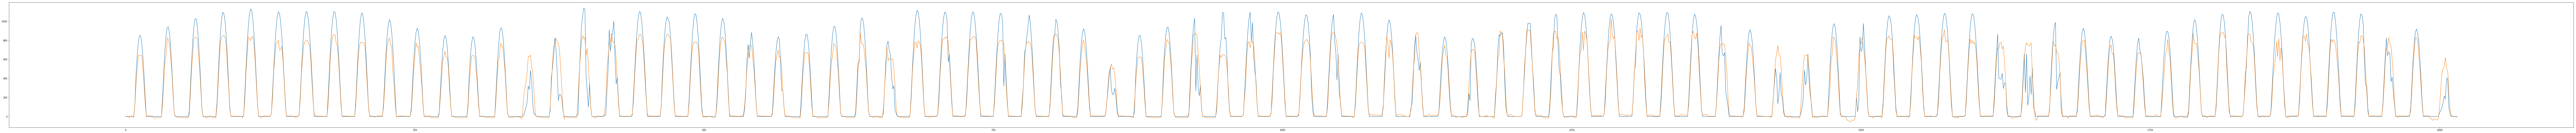

In [48]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(200,10))
plt.plot(test.index,test.GHI)
plt.plot(test.index,y_pred_test)

In [49]:
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    SimpleImputer(),
    RandomForestRegressor(n_estimators=200,min_samples_leaf=10)
)

pipeline.fit(train[features],train[target])

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred_train = pipeline.predict(train[features])

print(r2_score(train[target],y_pred_train))
print(mean_absolute_error(train[target],y_pred_train))

y_pred_test = pipeline.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.9185620603909872
43.411883462091794
0.9129890479501792
56.85420857583884


In [0]:
model = pipeline.named_steps['randomforestregressor']

[<matplotlib.lines.Line2D at 0x7fb2efb6e5f8>]

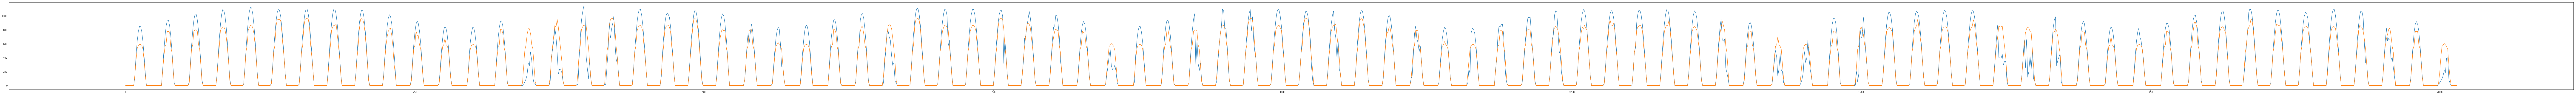

In [51]:
f = plt.figure(figsize=(200,7))
plt.plot(test.index,test.GHI)
plt.plot(test.index,y_pred_test)

In [52]:
!pip install shap

In [53]:
test.head()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature,Unnamed: 0,apparentTemperature,cel,cloudCover,date,dewPoint,humidity,icon,location,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,lat,long,zen
0,0,0,0,172.79,1,0,34.69,4.016667,NaN,2010-01-05 10:00:00,32.59,0.77,clear-night,hawaii,0.0,0.0,NaN,NaN,3,39.23,1262685600,0.0,NaN,95.0,8.31,6.22,19.410648,-155.587336,172.793061
1,0,0,0,171.81,1,1,35.09,4.422222,NaN,2010-01-05 11:00:00,34.49,0.81,clear-night,hawaii,0.0,0.0,NaN,NaN,3,39.96,1262689200,0.0,NaN,143.0,7.98,7.01,19.410648,-155.587336,171.821871
2,0,0,0,158.24,1,2,35.05,3.916667,NaN,2010-01-05 12:00:00,34.34,0.83,clear-night,hawaii,0.0,0.0,NaN,NaN,3,39.05,1262692800,0.0,NaN,143.0,8.08,5.40,19.410648,-155.587336,158.255848
3,0,0,0,144.41,1,3,32.73,2.622222,NaN,2010-01-05 13:00:00,36.38,0.99,clear-night,hawaii,0.0,0.0,NaN,NaN,3,36.72,1262696400,0.0,NaN,107.0,9.04,4.88,19.410648,-155.587336,144.419275
4,0,0,0,130.61,1,4,34.70,3.161111,NaN,2010-01-05 14:00:00,32.64,0.82,clear-night,hawaii,0.0,0.0,NaN,NaN,3,37.69,1262700000,0.0,NaN,158.0,8.41,3.95,19.410648,-155.587336,130.620135


In [0]:
import shap

In [0]:
si = SimpleImputer()
x_train = si.fit(train[features])

In [0]:
x_test = si.transform(test[features])

In [0]:
df = pd.DataFrame(x_test, columns=features)

In [0]:
row = df.iloc[[34]]

In [69]:
row.values[0]

array([5.20891015e+01, 4.50100000e+01, 1.00000000e+00, 1.01221222e+03,
       7.00200000e+00, 4.00000000e+00, 4.50100000e+01])

In [0]:
from sklearn.metrics import roc_auc_score

def pred(df, locc):
  row = df.iloc[[locc]]

  explainer = shap.TreeExplainer(model)
  row_processed = model.predict(row)[0]
  shap_values = explainer.shap_values(row)

  names = row.columns
  values = row.values[0]
  shaps = pd.Series(shap_values[0], zip(names, values))

  pr = f'GHI pred is {row_processed}'
  res = f'baseline is {explainer.expected_value}'
  rea = shaps.to_string()

  print(pr)
  print(res)
  shap.initjs()
  print(rea)
  return shap.force_plot(
      base_value=explainer.expected_value, 
      shap_values=shap_values, 
      features=row
  )

In [80]:
pred(df, 325)

GHI pred is 809.2646412345571
baseline is 222.5981264302059


(zen, 35.67729105249651)           463.680350
(temperature, 48.43)               -65.675041
(summary, 3.0)                      13.411459
(pressure, 1012.2122213137096)      -1.511071
(visibility, 7.625543533061856)      0.081408
(uvIndex, 1.4313953488372093)       -5.066884
(dewPoint, 48.43)                  181.746294
